In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import least_squares
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing

In [3]:
def generate(X):
    f_x = 1 / ((X ** 2) - (3 * X) + 2)
    f_x = np.clip(f_x, -100, 100)
    noise = np.random.normal(size=X.shape)
    return f_x + noise

In [4]:
x_k = 3 * np.arange(1001) / 1000
y_k = generate(x_k)

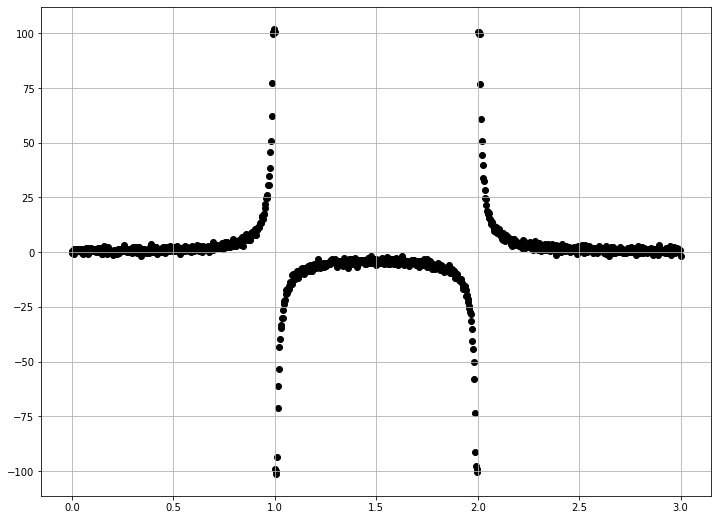

In [60]:
plt.figure(figsize=(12,9))
plt.scatter(x_k, y_k, color='black')
plt.grid()

In [14]:
def f(X, a, b, c, d):
    return (a * X + b) / (X**2 + c * X + d)

def least_squares_minimization(params):
    global x_k, y_k  
    a, b, c, d = params
    return np.sum((f(x_k, a, b, c, d) - y_k)**2)

def least_squares_lm(params):
    global x_k, y_k  
    a, b, c, d = params
    return f(x_k, a, b, c, d) - y_k

In [56]:
nm = minimize(least_squares_minimization, [0,0,0,0], method="Nelder-Mead", tol=0.001)
lm = least_squares(least_squares_lm, [1, 1, 1, 1], method="lm", xtol=0.001, ftol=0.001)
de = differential_evolution(least_squares_minimization, [(0, 1), (0, 1), (0, 1), (0, 1)], x0=[1, 1, 1, 1], tol=0.001, maxiter=1000)
da = dual_annealing(least_squares_minimization, [(0, 1), (0, 1), (0, 1), (0, 1)], x0=[1, 1, 1, 1], maxiter=1000)

C:\Users\rbezaev\AppData\Local\Temp/ipykernel_2844/4090107763.py:2: RuntimeWarning: invalid value encountered in true_divide
  return (a * X + b) / (X**2 + c * X + d)
C:\Users\rbezaev\AppData\Local\Temp/ipykernel_2844/4090107763.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (a * X + b) / (X**2 + c * X + d)
c:\users\rbezaev\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


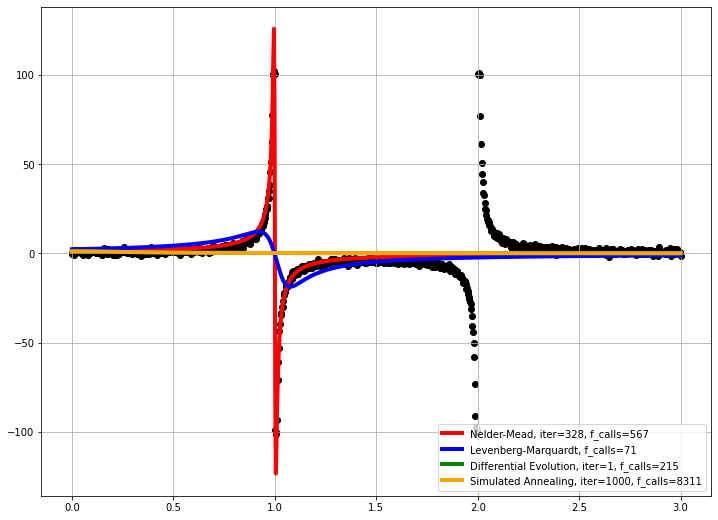

In [58]:
plt.figure(figsize=(12,9))
plt.scatter(x_k, y_k, color='black')
plt.plot(x_k, (nm.x[0] * x_k + nm.x[1]) / (x_k**2 + nm.x[2] * x_k + nm.x[3]), color='red', label=f"Nelder-Mead, iter={nm.nit}, f_calls={nm.nfev}", linewidth=4)
plt.plot(x_k, (lm.x[0] * x_k + lm.x[1]) / (x_k**2 + lm.x[2] * x_k + lm.x[3]), color='blue', label=f"Levenberg-Marquardt, f_calls={lm.nfev}", linewidth=4)
plt.plot(x_k, (de.x[0] * x_k + de.x[1]) / (x_k**2 + de.x[2] * x_k + de.x[3]), color='green', label=f"Differential Evolution, iter={de.nit}, f_calls={de.nfev}", linewidth=4)
plt.plot(x_k, (da.x[0] * x_k + da.x[1]) / (x_k**2 + da.x[2] * x_k + da.x[3]), color='orange', label=f"Simulated Annealing, iter={da.nit}, f_calls={da.nfev}", linewidth=4)
plt.legend()
plt.grid()